In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcol
import matplotlib.cm as cm

In [2]:
data_chroma = pd.read_csv("sei_diffs.csv", dtype={'CHROM_hg38': "string", 'POS_hg38': "string", 'CHROM_hg19': "string"})
data_seq = pd.read_csv("hgmd.raw.matrix.csv", dtype={'CHROM_hg38': "string", 'POS_hg38': "string", 'CHROM_hg19': "string"})

In [3]:
data_chroma['phenotype'] = data_chroma['phenotype'] + ' (chr' + data_chroma['CHROM_hg19'].astype(str) + ':' + data_chroma['POS_hg19'].astype(str) +  ', ' + data_chroma['REF'].astype(str) + ' to ' + data_chroma['ALT'].astype(str) +  ')'
data_chroma1 = data_chroma.iloc[:,9:]
data_chroma2 = data_chroma1.set_index('phenotype')

In [4]:
data_seq['phenotype'] = data_seq['phenotype'] + ' (chr' + data_seq['CHROM_hg19'].astype(str) + ':' + data_seq['POS_hg19'].astype(str) +  ', ' + data_seq['REF'].astype(str) + ' to ' + data_seq['ALT'].astype(str) +  ')'
data_seq1 = data_seq.iloc[:,9:]
data_seq1.drop(data_seq1.iloc[:, 1:3], axis = 1, inplace = True)
data_seq2 = data_seq1.set_index('phenotype')

In [5]:
cm = mcol.ListedColormap(['blue', 'red'])

In [6]:
def summary_results(data_chromatin, data_sequence_class, phenotype):
    data_c = data_chromatin.T.copy()
    labels_c = list(data_c.columns.values.tolist())
    index_c = data_c.columns.get_loc(phenotype)
    
    data_s = data_sequence_class.T.copy()
    labels_s = list(data_s.columns.values.tolist())
    index_s = data_s.columns.get_loc(phenotype)
    
    
    
    c = data_c[[labels_c[index_c]]].copy()
    c1 = c.sort_values(by = labels_c[index_c], key=abs, ascending = False)
    
    s = data_s[[labels_s[index_s]]].copy()
    s1 = s.sort_values(by = labels_s[index_s], key=abs, ascending = False)
    
    x = c1.head(15).to_numpy()
    y = c1.head(15).T.columns.values.tolist()
    max_seq = s1.head(1).T.columns.values.tolist()
    
    plt.figure(figsize=(25, 15))

    sc = plt.scatter(abs(x), y, c= x , vmin=-0.6, vmax=0.6, s=100, cmap=cm)
    plt.xticks(fontsize = 23)
    plt.yticks(fontsize = 22)

    

    
    legend_elements = [Line2D([0], [0], marker='.', color='w', label='Negative',
                          markerfacecolor='b', markersize=25),
                   Line2D([0], [0], marker='.', color='w', label='Positive',
                          markerfacecolor='r', markersize=25)]
    
    legend = plt.legend(handles = legend_elements, loc = 0, fontsize = 22, title = "Effect direction\n",
                       title_fontsize = 25, fancybox = True)
    
    title = f"Relevant chromatin profile variant effects:\n{phenotype}\n\nSequence class: {max_seq[0]}"
    
    plt.gca().invert_yaxis()

  
    plt.title(title, fontsize = 25)
    plt.show()
    
    

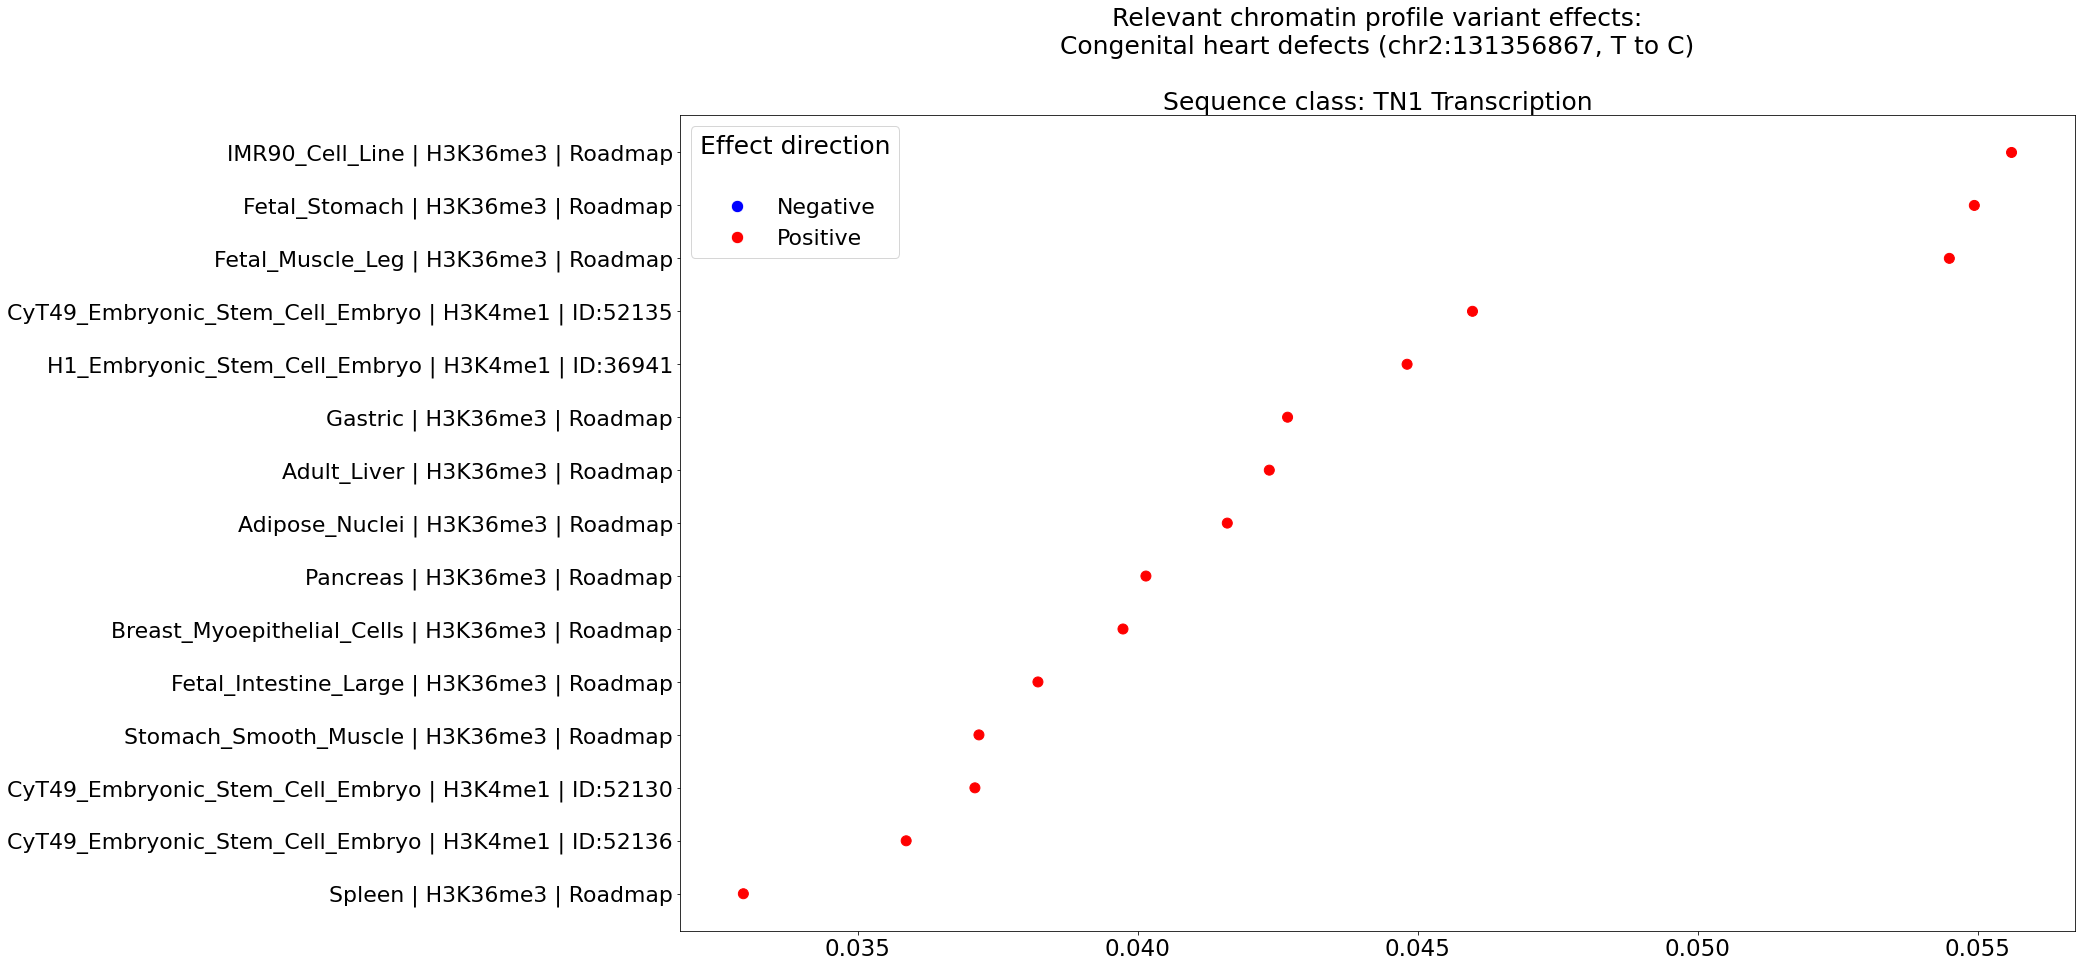

In [7]:
summary_results(data_chroma2, data_seq2, "Congenital heart defects (chr2:131356867, T to C)")